Copyright (C) 2025 Joel Sebastian, github.com/JoelSeb 
<br>
Licensed under the Apache License, Version 2.0 (the "License");
<br>
you may not use this file except in compliance with the License.
<br>
You may obtain a copy of the License at:
<br>
<br>
    http://www.apache.org/licenses/LICENSE-2.0
<br>
<br>
Unless required by applicable law or agreed to in writing, software
<br>
distributed under the License is distributed on an "AS IS" BASIS,
<br>
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
<br>
See the License for the specific language governing permissions and
<br>
limitations under the License.

# Import Required Libraries
Import the necessary libraries, including NumPy and Matplotlib.

In [1]:
# Import Required Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import json
import re
from collections import defaultdict

# Load Text File
Load the contents of the text file into a variable.

In [2]:
# Load Text Files
def load_text_file(filepath):
    with open(os.path.abspath(filepath), 'r') as file:
        return file.read().rstrip().splitlines()

llm_1 = load_text_file('heightmaps/llm_1.txt')
llm_2 = load_text_file('heightmaps/llm_2.txt')
reg_1 = load_text_file('heightmaps/regular_1.txt')
reg_2 = load_text_file('heightmaps/regular_2.txt')
rand_1 = load_text_file('heightmaps/random_1.txt')
rand_2 = load_text_file('heightmaps/random_2.txt')
rand_3 = load_text_file('heightmaps/random_3.txt')
rand_4 = load_text_file('heightmaps/random_4.txt')

# Convert the text data into a 2D numpy arrays, filtering out empty strings
llm_1_array = np.array([list(map(int, filter(None, line.split(',')))) for line in llm_1])
llm_2_array = np.array([list(map(int, filter(None, line.split(',')))) for line in llm_2])
reg_1_array = np.array([list(map(int, filter(None, line.split(',')))) for line in reg_1])
reg_2_array = np.array([list(map(int, filter(None, line.split(',')))) for line in reg_2])
rand_1_array = np.array([list(map(int, filter(None, line.split(',')))) for line in rand_1])
rand_2_array = np.array([list(map(int, filter(None, line.split(',')))) for line in rand_2])
rand_3_array = np.array([list(map(int, filter(None, line.split(',')))) for line in rand_3])
rand_4_array = np.array([list(map(int, filter(None, line.split(',')))) for line in rand_4])

# Display the heightmap arrays
print(llm_1_array)
print(llm_2_array)
print(reg_1_array)
print(reg_2_array)
print(rand_1_array)
print(rand_2_array)
print(rand_3_array)
print(rand_4_array)

[[ 0  0  1 ... 22 22 22]
 [ 0  0  2 ... 22 22 22]
 [ 0  0  1 ... 22 22 22]
 ...
 [ 6  7  8 ...  1  0  2]
 [ 7  8  8 ...  0  1  0]
 [ 8  9  9 ...  1  0  0]]
[[ 0  0  1 ... 21 21 21]
 [ 0  1  1 ... 21 21 21]
 [ 0  1  1 ... 21 21 21]
 ...
 [ 6  7  8 ...  0  0  0]
 [ 7  8  8 ...  0  0  0]
 [ 8  9  9 ...  0  0  0]]
[[ 7  5  4 ... 33 33 33]
 [ 7  5  4 ... 33 33 33]
 [ 6  5  4 ... 33 33 34]
 ...
 [39 39 40 ...  0  0  0]
 [40 39 39 ...  0  0  0]
 [39 39 39 ...  0  0  0]]
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [14 14 13 ...  0  0  0]
 [14 14 13 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 

# Process Text Data
Process the text data to convert it into numerical values suitable for a heightmap.

In [3]:
def normalise(array):
    return (array - np.min(array)) / (np.max(array) - np.min(array))

# Process Text Data
# Normalise the heightmap data to a range of 0 to 1
llm_1_normalised = normalise(llm_1_array)
llm_2_normalised = normalise(llm_2_array)
reg_1_normalised = normalise(reg_1_array)
reg_2_normalised = normalise(reg_2_array)
rand_1_normalised = normalise(rand_1_array)
rand_2_normalised = normalise(rand_2_array)
rand_3_normalised = normalise(rand_3_array)
rand_4_normalised = normalise(rand_4_array)

# Display the normalised heightmap arrays
print(llm_1_normalised)
print(llm_2_normalised)
print(reg_1_normalised)
print(reg_2_normalised)
print(rand_1_normalised)
print(rand_2_normalised)
print(rand_3_normalised)
print(rand_4_normalised)

[[0.         0.         0.02941176 ... 0.64705882 0.64705882 0.64705882]
 [0.         0.         0.05882353 ... 0.64705882 0.64705882 0.64705882]
 [0.         0.         0.02941176 ... 0.64705882 0.64705882 0.64705882]
 ...
 [0.17647059 0.20588235 0.23529412 ... 0.02941176 0.         0.05882353]
 [0.20588235 0.23529412 0.23529412 ... 0.         0.02941176 0.        ]
 [0.23529412 0.26470588 0.26470588 ... 0.02941176 0.         0.        ]]
[[0.         0.         0.02702703 ... 0.56756757 0.56756757 0.56756757]
 [0.         0.02702703 0.02702703 ... 0.56756757 0.56756757 0.56756757]
 [0.         0.02702703 0.02702703 ... 0.56756757 0.56756757 0.56756757]
 ...
 [0.16216216 0.18918919 0.21621622 ... 0.         0.         0.        ]
 [0.18918919 0.21621622 0.21621622 ... 0.         0.         0.        ]
 [0.21621622 0.24324324 0.24324324 ... 0.         0.         0.        ]]
[[0.14583333 0.10416667 0.08333333 ... 0.6875     0.6875     0.6875    ]
 [0.14583333 0.10416667 0.08333333 ... 

# Generate Heightmap
Use the processed data to generate a heightmap.

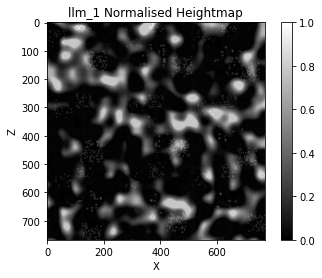

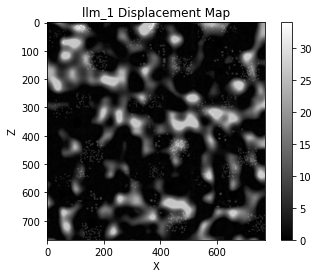

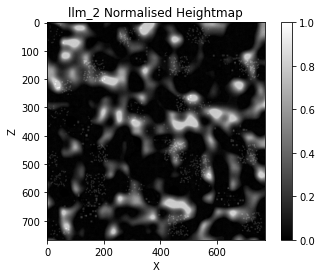

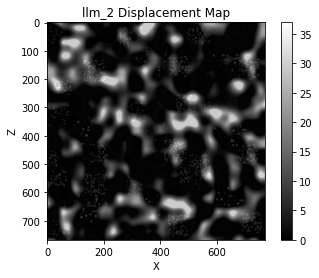

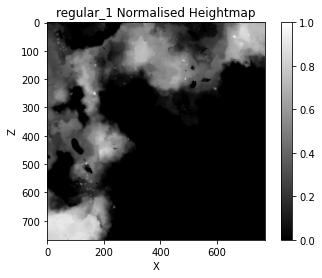

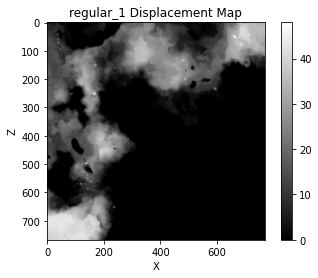

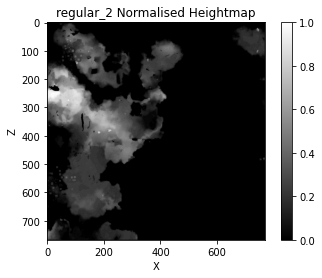

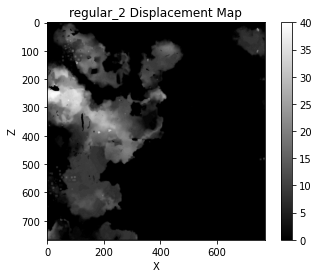

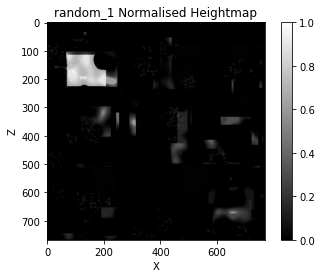

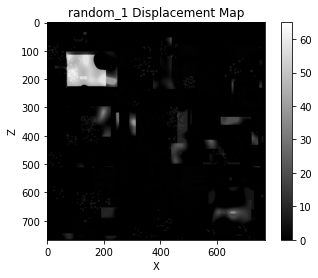

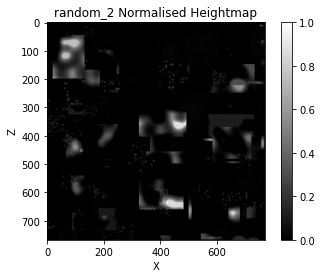

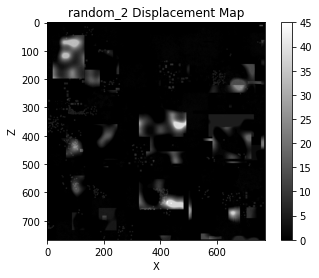

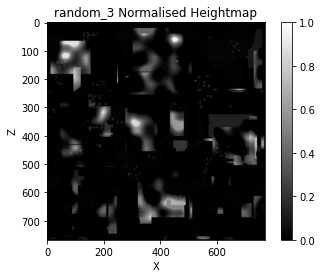

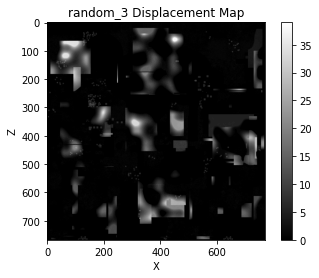

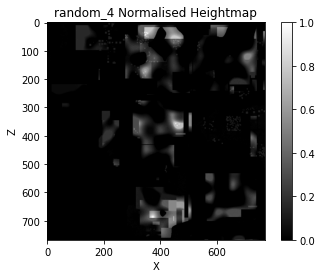

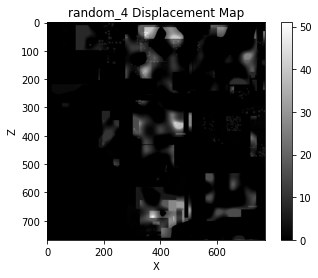

In [27]:
# Generate Heightmap
def generate_heightmap(heightmap_normalised, name='', normalised=True):
    plt.imshow(heightmap_normalised, cmap='gray')
    plt.colorbar()
    plt.title(name + (' Normalised Heightmap' if normalised else ' Displacement Map'))
    plt.xlabel('X')
    plt.ylabel('Z')
    plt.show()

# Generate Heightmaps
generate_heightmap(llm_1_normalised, name='llm_1')
generate_heightmap(llm_1_array, name='llm_1', normalised=False)
generate_heightmap(llm_2_normalised, name='llm_2')
generate_heightmap(llm_2_array, name='llm_2', normalised=False)
generate_heightmap(reg_1_normalised, name='regular_1')
generate_heightmap(reg_1_array, name='regular_1', normalised=False)
generate_heightmap(reg_2_normalised, name='regular_2')
generate_heightmap(reg_2_array, name='regular_2', normalised=False)
generate_heightmap(rand_1_normalised, name='random_1')
generate_heightmap(rand_1_array, name='random_1', normalised=False)
generate_heightmap(rand_2_normalised, name='random_2')
generate_heightmap(rand_2_array, name='random_2', normalised=False)
generate_heightmap(rand_3_normalised, name='random_3')
generate_heightmap(rand_3_array, name='random_3', normalised=False)
generate_heightmap(rand_4_normalised, name='random_4')
generate_heightmap(rand_4_array, name='random_4', normalised=False)

# Visualise Heightmap
Use Matplotlib to visualise the generated heightmap.

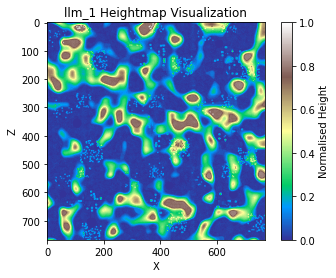

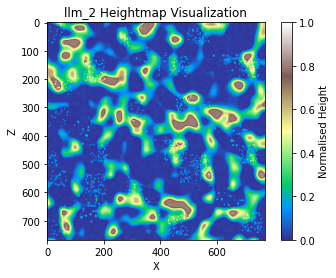

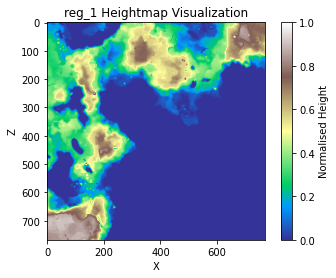

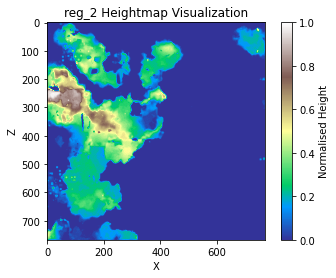

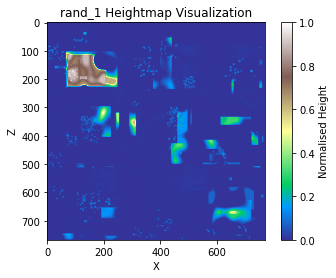

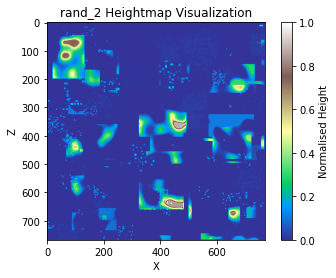

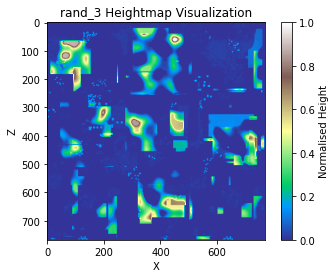

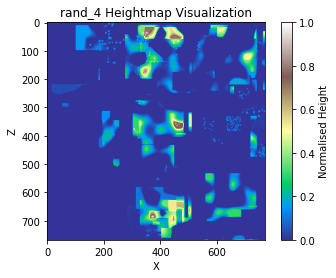

In [28]:
# Visualise Heightmap
def visualise_heightmap(heightmap_normalised, reverse=False, type='terrain', name=''):
    plt.imshow(heightmap_normalised, cmap='terrain')  # Use 'terrain' colormap for better visualization
    if type == 'terrain':
        plt.colorbar(label='Normalised Height')
    else:
        plt.colorbar(label='Value')
    if type == 'water':
        plt.title(name + 'Watermap Visualization')
    else:   
        plt.title(name + 'Heightmap Visualization')
    plt.xlabel('X')
    plt.ylabel('Z')

    # Flip the colours if reverse is True (blue for high, white for low)
    if reverse:
        plt.imshow(heightmap_normalised, cmap='terrain_r')

    plt.show()

# Visualise Heightmaps
visualise_heightmap(llm_1_normalised, name='llm_1 ')
visualise_heightmap(llm_2_normalised, name='llm_2 ')
visualise_heightmap(reg_1_normalised, name='reg_1 ')
visualise_heightmap(reg_2_normalised, name='reg_2 ')
visualise_heightmap(rand_1_normalised, name='rand_1 ')
visualise_heightmap(rand_2_normalised, name='rand_2 ')
visualise_heightmap(rand_3_normalised, name='rand_3 ')
visualise_heightmap(rand_4_normalised, name='rand_4 ')

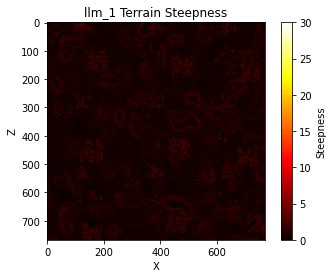

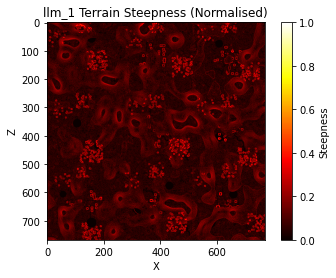

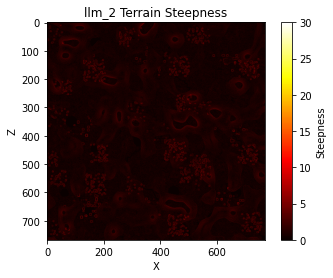

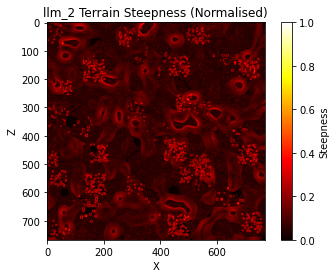

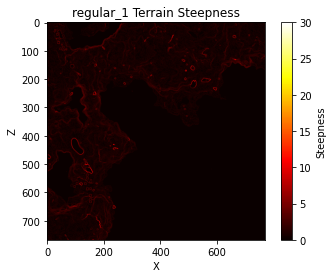

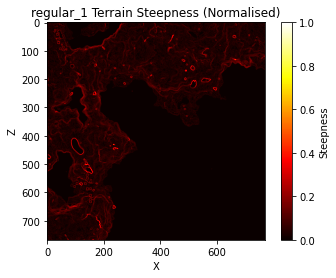

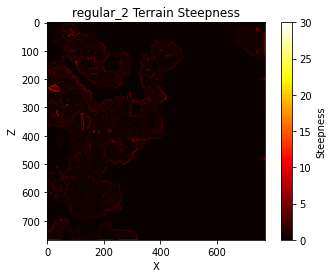

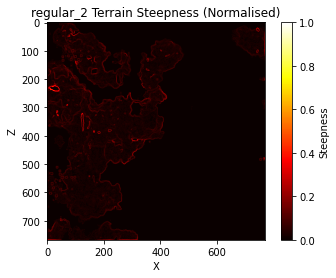

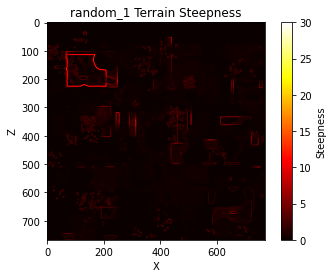

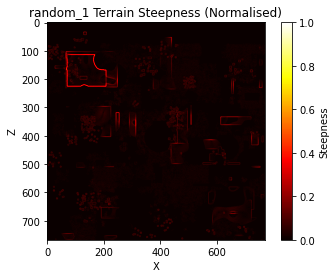

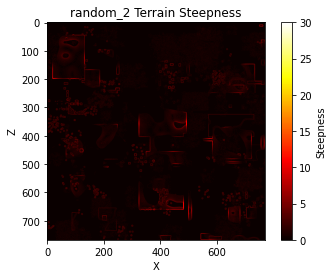

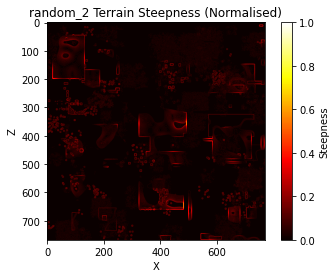

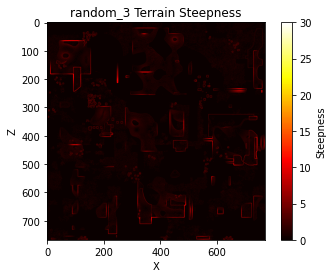

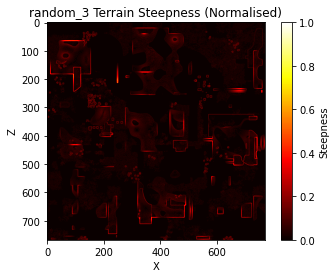

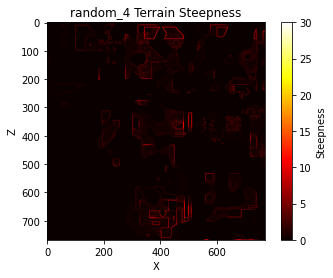

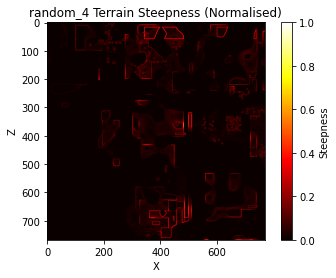

In [29]:
heightmaps = {
    'llm_1': llm_1_array,
    'llm_2': llm_2_array,
    'regular_1': reg_1_array,
    'regular_2': reg_2_array,
    'random_1': rand_1_array,
    'random_2': rand_2_array,
    'random_3': rand_3_array,
    'random_4': rand_4_array
}

for name, heightmap in heightmaps.items():
    # Compute gradients
    grad_z, grad_x = np.gradient(heightmap)
    gradient_magnitude = np.sqrt(grad_x**2 + grad_z**2)
    gradient_magnitude_normalised = gradient_magnitude / np.max(gradient_magnitude)
    
    # Plot gradient magnitude
    plt.imshow(gradient_magnitude, cmap='hot', vmin=0, vmax=30)
    plt.colorbar(label='Steepness')
    plt.title(f'{name} Terrain Steepness')
    plt.xlabel('X')
    plt.ylabel('Z')
    plt.show()

    # Plot gradient magnitude (normalised)
    plt.imshow(gradient_magnitude_normalised, cmap='hot')
    plt.colorbar(label='Steepness')
    plt.title(f'{name} Terrain Steepness (Normalised)')
    plt.xlabel('X')
    plt.ylabel('Z')
    plt.show()

In [30]:
# Compute the average gradient magnitude and variance for each heightmap
average_gradient_magnitudes = {}
steepness_variances = {}

for name, heightmap in heightmaps.items():
    grad_z, grad_x = np.gradient(heightmap)
    gradient_magnitude = np.sqrt(grad_x**2 + grad_z**2)
    average_gradient_magnitudes[name] = np.mean(gradient_magnitude)
    steepness_variances[name] = np.var(gradient_magnitude)

# Display the average gradient magnitude and variance for each heightmap
for name, avg_gradient_magnitude in average_gradient_magnitudes.items():
    print(f'{name}')
    print(f'Average gradient magnitude: {avg_gradient_magnitude}')
    print(f'Variance: {steepness_variances[name]}\n')

llm_1
Average gradient magnitude: 0.7361022997745925
Variance: 0.39855977972771045

llm_2
Average gradient magnitude: 0.7544606874975999
Variance: 0.4382595198324983

regular_1
Average gradient magnitude: 0.36450813909256874
Variance: 0.4800276628351857

regular_2
Average gradient magnitude: 0.28181994494295676
Variance: 0.53221590567662

random_1
Average gradient magnitude: 0.3328611939922933
Variance: 1.2963664097462648

random_2
Average gradient magnitude: 0.33664889575785867
Variance: 0.6909892339027659

random_3
Average gradient magnitude: 0.38691223064504937
Variance: 0.906238070335649

random_4
Average gradient magnitude: 0.2844294219688587
Variance: 0.9816918805080882



# Watermaps

In [31]:
# Load Watermaps
water_llm_1 = load_text_file('watermaps/llm_1.txt')
water_llm_2 = load_text_file('watermaps/llm_2.txt')
water_reg_1 = load_text_file('watermaps/regular_1.txt')
water_reg_2 = load_text_file('watermaps/regular_2.txt')
water_rand_1 = load_text_file('watermaps/random_1.txt')
water_rand_2 = load_text_file('watermaps/random_2.txt')
water_rand_3 = load_text_file('watermaps/random_3.txt')
water_rand_4 = load_text_file('watermaps/random_4.txt')

# Convert the text data into 2D numpy arrays
water_llm_1_array = np.array([list(map(int, filter(None, line.split(',')))) for line in water_llm_1])
water_llm_2_array = np.array([list(map(int, filter(None, line.split(',')))) for line in water_llm_2])
water_reg_1_array = np.array([list(map(int, filter(None, line.split(',')))) for line in water_reg_1])
water_reg_2_array = np.array([list(map(int, filter(None, line.split(',')))) for line in water_reg_2])
water_rand_1_array = np.array([list(map(int, filter(None, line.split(',')))) for line in water_rand_1])
water_rand_2_array = np.array([list(map(int, filter(None, line.split(',')))) for line in water_rand_2])
water_rand_3_array = np.array([list(map(int, filter(None, line.split(',')))) for line in water_rand_3])
water_rand_4_array = np.array([list(map(int, filter(None, line.split(',')))) for line in water_rand_4])

# Display the watermap arrays
print(water_llm_1_array)
print(water_llm_2_array)
print(water_reg_1_array)
print(water_reg_2_array)
print(water_rand_1_array)
print(water_rand_2_array)
print(water_rand_3_array)
print(water_rand_4_array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]


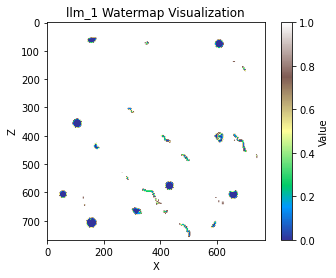

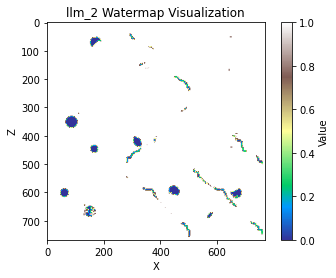

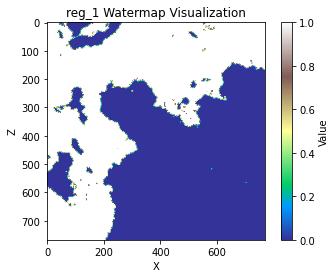

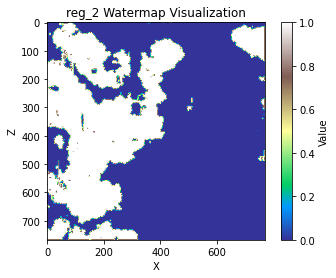

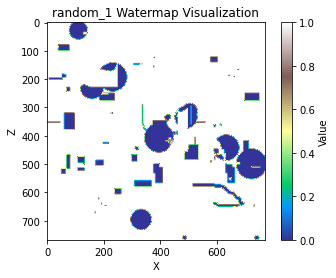

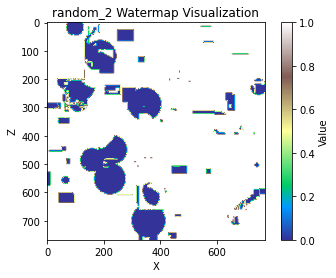

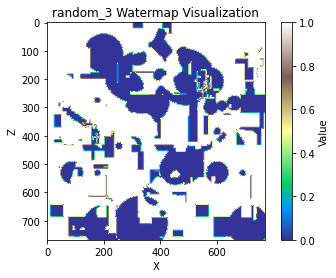

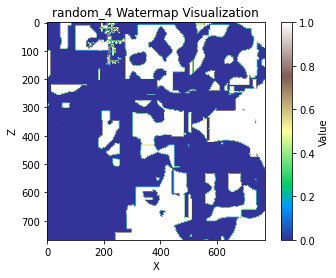

In [38]:
# Visualise Watermaps
visualise_heightmap(water_llm_1_array, reverse=True, type="water", name='llm_1 ')
visualise_heightmap(water_llm_2_array, reverse=True, type="water", name='llm_2 ')
visualise_heightmap(water_reg_1_array, reverse=True, type="water", name='reg_1 ')
visualise_heightmap(water_reg_2_array, reverse=True, type="water", name='reg_2 ')
visualise_heightmap(water_rand_1_array, reverse=True, type="water", name='random_1 ')
visualise_heightmap(water_rand_2_array, reverse=True, type="water", name='random_2 ')
visualise_heightmap(water_rand_3_array, reverse=True, type="water", name='random_3 ')
visualise_heightmap(water_rand_4_array, reverse=True, type="water", name='random_4 ')

In [33]:
def calculate_water_percentage(watermap_array):
    total_elements = watermap_array.size
    water_elements = np.sum(watermap_array == 1)
    return (water_elements / total_elements) * 100

# Calculate and print the water percentage for each watermap
water_llm_1_percentage = calculate_water_percentage(water_llm_1_array)
water_llm_2_percentage = calculate_water_percentage(water_llm_2_array)
water_reg_1_percentage = calculate_water_percentage(water_reg_1_array)
water_reg_2_percentage = calculate_water_percentage(water_reg_2_array)
water_rand_1_percentage = calculate_water_percentage(water_rand_1_array)
water_rand_2_percentage = calculate_water_percentage(water_rand_2_array)
water_rand_3_percentage = calculate_water_percentage(water_rand_3_array)
water_rand_4_percentage = calculate_water_percentage(water_rand_4_array)

# Map each water percentage to its filename
file_to_water_percentage = {
    'llm_1': water_llm_1_percentage,
    'llm_2': water_llm_2_percentage,
    'regular_1': water_reg_1_percentage,
    'regular_2': water_reg_2_percentage,
    'random_1': water_rand_1_percentage,
    'random_2': water_rand_2_percentage,
    'random_3': water_rand_3_percentage,
    'random_4': water_rand_4_percentage
}

print(f"LLM 1 Water Percentage: {water_llm_1_percentage:.2f}%")
print(f"LLM 2 Water Percentage: {water_llm_2_percentage:.2f}%")
print(f"Regular 1 Water Percentage: {water_reg_1_percentage:.2f}%")
print(f"Regular 2 Water Percentage: {water_reg_2_percentage:.2f}%")
print(f"Random 1 Water Percentage: {water_rand_1_percentage:.2f}%")
print(f"Random 2 Water Percentage: {water_rand_2_percentage:.2f}%")
print(f"Random 3 Water Percentage: {water_rand_3_percentage:.2f}%")
print(f"Random 4 Water Percentage: {water_rand_4_percentage:.2f}%")

LLM 1 Water Percentage: 1.34%
LLM 2 Water Percentage: 1.67%
Regular 1 Water Percentage: 52.56%
Regular 2 Water Percentage: 65.76%
Random 1 Water Percentage: 10.59%
Random 2 Water Percentage: 14.94%
Random 3 Water Percentage: 32.98%
Random 4 Water Percentage: 67.72%


# Top 3 Block Proportions at each y-level
If the proportions are similar with the same blocks at consecutive y-levels, we will display a new average proportion of the top 3 blocks for a range of y-levels

In [34]:
# Path to folder where block proportions are at
# ../mc-project/src/main/large_terrains/processed_data
block_proportions_folder = '../mc-project/src/main/large_terrains/processed_data'

def are_distributions_similar(dist1, dist2, tolerance=5.0, top_n=3):
    """Checks if the top N blocks of two distributions are similar."""

    # Get the top N blocks from each distribution
    top_dist1 = dict(sorted(dist1.items(), key=lambda item: float(item[1][:-1]), reverse=True)[:top_n])
    top_dist2 = dict(sorted(dist2.items(), key=lambda item: float(item[1][:-1]), reverse=True)[:top_n])

    # Combine all unique blocks from the top N of both distributions
    all_blocks = set(top_dist1.keys()).union(top_dist2.keys())

    for block in all_blocks:
        freq1_str = top_dist1.get(block, "0.0%")
        freq2_str = top_dist2.get(block, "0.0%")
        try:
            freq1 = float(freq1_str[:-1])
            freq2 = float(freq2_str[:-1])
        except ValueError:
            return False
        if abs(freq1 - freq2) > tolerance:
            return False

    return True

def distribution_from_block_list(block_list):
    """Converts a list of block data to a distribution dictionary."""
    dist = {}
    for block_data in block_list:
        if 'block' in block_data and 'frequency' in block_data:
            dist[block_data['block']] = block_data['frequency']
    return dist

def average_distributions(distributions, top_n=3):
    """Averages the top N blocks of a list of distributions."""
    all_blocks = set()
    for dist in distributions:
        all_blocks.update(dist.keys())

    averaged_dist = defaultdict(float)

    for block in all_blocks:
        total_freq = 0
        present_count = 0
        for dist in distributions:
            freq_str = dist.get(block, "0.0%")
            try:
                freq = float(freq_str[:-1])
                total_freq += freq
                present_count +=1
            except ValueError:
                pass
        if present_count > 0:
            averaged_dist[block] = total_freq / present_count
    
    # Get top N after averaging
    top_averaged_dist = dict(sorted(averaged_dist.items(), key=lambda item: item[1], reverse=True)[:top_n])

    # Format as strings with "%"
    formatted_dist = {block: f"{freq:.2f}%" for block, freq in top_averaged_dist.items()}
    return formatted_dist

# Collect data for each file
file_data = {}

for filename in os.listdir(block_proportions_folder):
    if filename.endswith(".txt"):
        filepath = os.path.join(block_proportions_folder, filename)

        try:
            with open(filepath, 'r') as f:
                data = json.load(f)

            if 'layers' in data and isinstance(data['layers'], list) and 'start' in data and 'y' in data['start']:
                sea_level = data['start']['y']
                file_data[filename] = {
                    "sea_level": sea_level,
                    "layers": {layer['y']: layer['types'] for layer in data['layers'] if 'y' in layer and 'types' in layer and isinstance(layer['types'], list)}
                }
            else:
                print(f"'layers' or 'start' data invalid in {filename}")

        except FileNotFoundError:
            print(f"File not found: {filepath}")
        except json.JSONDecodeError:
            print(f"Invalid JSON in file: {filepath}")
        except Exception as e:
            print(f"An error occurred: {e} in {filename}")

# Print the results
for filename, data in file_data.items():
    print(f"File: {filename}")
    sea_level = data['sea_level']
    layers = data['layers']
    sorted_y = sorted(layers.keys())
    
    i = 0
    while i < len(sorted_y):
        start_y = sorted_y[i]
        end_y = start_y
        
        j = i + 1
        while j < len(sorted_y):
            if are_distributions_similar(
                {item['block']: item['frequency'] for item in layers[start_y]},
                {item['block']: item['frequency'] for item in layers[sorted_y[j]]}
            ):
                end_y = sorted_y[j]
                j += 1
            else:
                break

        distributions_to_average = [distribution_from_block_list(layers[y]) for y in range(start_y, end_y + 1)] #Convert from list to dist
        averaged_distribution = average_distributions(distributions_to_average)
        
        if start_y == end_y:
            print(f"  Sea Level + {start_y - sea_level}:")
        else:
            print(f"  Sea Level + {start_y - sea_level} - Sea Level + {end_y - sea_level}:")

        for block, frequency in averaged_distribution.items(): #Print the averaged distribution
            print(f"    - {block}: {frequency}")
        i = j
    print("-" * 20)

File: regular_1.txt
  Sea Level + 0:
    - Block{minecraft:water}: 53.84%
    - Block{minecraft:stone}: 37.17%
    - Block{minecraft:dirt}: 5.54%
  Sea Level + 1 - Sea Level + 3:
    - Block{minecraft:air}: 56.62%
    - Block{minecraft:stone}: 35.00%
    - Block{minecraft:dirt}: 4.18%
  Sea Level + 4 - Sea Level + 8:
    - Block{minecraft:air}: 62.09%
    - Block{minecraft:stone}: 30.55%
    - Block{minecraft:dirt}: 4.34%
  Sea Level + 9 - Sea Level + 12:
    - Block{minecraft:air}: 67.23%
    - Block{minecraft:stone}: 24.78%
    - Block{minecraft:dirt}: 4.50%
  Sea Level + 13 - Sea Level + 16:
    - Block{minecraft:air}: 73.19%
    - Block{minecraft:stone}: 19.03%
    - Block{minecraft:dirt}: 4.69%
  Sea Level + 17 - Sea Level + 19:
    - Block{minecraft:air}: 78.56%
    - Block{minecraft:stone}: 14.75%
    - Block{minecraft:dirt}: 3.54%
  Sea Level + 20 - Sea Level + 24:
    - Block{minecraft:air}: 83.97%
    - Block{minecraft:stone}: 11.07%
    - Block{minecraft:dirt}: 3.22%
  Sea L

# Find out how many roses, lily of the valley, peony, lilac and short grass blocks there are
(Roses and Peonies come with two halves, so can divide counted amount by two)

In [35]:
# Path to RLE folder
rle_folder = '../mc-project/src/main/large_terrains/rle_data'

mappings_to_find = {
    "minecraft:short_grass" : None, 
    "minecraft:lilac" : None,
    "minecraft:rose_bush" : None,
    "minecraft:lily_of_the_valley" : None, 
    "minecraft:peony": None
}

def find_symbol(json_data, block_name):
    """Finds the symbol for a block in the mappings."""
    if "mappings" in json_data and isinstance(json_data["mappings"], list):
        for mapping in json_data["mappings"]:
            if "block" in mapping and "symbol" in mapping and mapping["block"] == block_name:
                return mapping["symbol"]
    return None

def count_symbols_in_grid(grid, symbol):
    """Counts the occurrences of a symbol in a grid (list of strings)."""
    total_count = 0
    special_chars = re.escape("!@#$%^&*()-_=+")  # Escape special characters for regex
    pattern = r"(?<![a-zA-Z" + special_chars + r"])(\d*)" + re.escape(symbol) + r"(?![a-zA-Z" + special_chars + r"])"
    for row in grid:
        for rle_string in row:
            for match in re.finditer(pattern, rle_string):
                count_str = match.group(1)  # Extract the captured group (the count)
                if count_str:  # Check if a count was actually captured
                    total_count += int(count_str)
                else:
                    total_count += 1  # If no count, it's a single occurrence
    return total_count

for filename in os.listdir(rle_folder):
    if filename.endswith(".txt"):
        filepath = os.path.join(rle_folder, filename)
        try:
            with open(filepath, 'r') as f:
                data = json.load(f)
                specific_mappings = mappings_to_find.copy()  # Create a copy for each file
                symbol_counts = {block: 0 for block in mappings_to_find} #Initialize counts

                if 'mappings' in data and isinstance(data['mappings'], list):
                    for block_name in mappings_to_find:
                        symbol = find_symbol(data, block_name)
                        if symbol:
                            specific_mappings[block_name] = symbol

                if 'grids' in data and isinstance(data['grids'], list):
                    for grid_data in data['grids']:
                        if 'grid' in grid_data and isinstance(grid_data['grid'], list):
                            for block_name, symbol in specific_mappings.items():
                                if symbol:
                                    symbol_counts[block_name] += count_symbols_in_grid(grid_data['grid'], symbol)
                
                print(f"File: {filename}")
                for block, count in symbol_counts.items():
                    print(f"  {block.removeprefix('minecraft:')}: {count}")
                    # Playable area is 768^2 x (1 - water_percentage/100) 
                    playable_area = 589824 * (1 - file_to_water_percentage[filename.removesuffix('.txt')] / 100)
                    correct_count = count/2 if block in ["minecraft:rose_bush", "minecraft:peony"] else count 
                    percentage = round((correct_count / playable_area) * 100, 2)  # Round to 2 decimal places
                    print(f"  Percentage on playable area: {percentage}%")
                    print()

                print("-" * 20)

        except FileNotFoundError:
            print(f"File not found: {filepath}")
        except json.JSONDecodeError:
            print(f"Invalid JSON in file: {filepath}")
        except Exception as e:
            print(f"An error occurred: {e} in {filename}")

File: regular_1.txt
  short_grass: 43587
  Percentage on playable area: 15.58%

  lilac: 0
  Percentage on playable area: 0.0%

  rose_bush: 0
  Percentage on playable area: 0.0%

  lily_of_the_valley: 0
  Percentage on playable area: 0.0%

  peony: 0
  Percentage on playable area: 0.0%

--------------------
File: llm_1.txt
  short_grass: 134697
  Percentage on playable area: 23.15%

  lilac: 6987
  Percentage on playable area: 1.2%

  rose_bush: 6854
  Percentage on playable area: 0.59%

  lily_of_the_valley: 3499
  Percentage on playable area: 0.6%

  peony: 7991
  Percentage on playable area: 0.69%

--------------------
File: llm_2.txt
  short_grass: 130905
  Percentage on playable area: 22.57%

  lilac: 7287
  Percentage on playable area: 1.26%

  rose_bush: 6972
  Percentage on playable area: 0.6%

  lily_of_the_valley: 3376
  Percentage on playable area: 0.58%

  peony: 7234
  Percentage on playable area: 0.62%

--------------------
File: regular_2.txt
  short_grass: 23331
  Perc

In [36]:
# Number of trees and villages in each terrain
tree_counts = {
    "llm_1": 780,
    "llm_2": 855,
    "regular_1": 57,
    "regular_2": 37,
    "random_1": 444,
    "random_2": 467,
    "random_3": 219,
    "random_4": 259
}

village_counts = {
    "llm_1": 8,
    "llm_2": 9,
    "regular_1": 2,
    "regular_2": 2,
    "random_1": 4,
    "random_2": 5,
    "random_3": 3,
    "random_4": 2
}

# Print how many trees and villages there are in each terrain per playable area
for terrain, tree_count in tree_counts.items():
    print(f"{terrain.capitalize()} Terrain:")
    print(f"  Trees: {tree_count}")
    print(f"  Villages: {village_counts[terrain]}")
    playable_area = round(589824 * (1 - file_to_water_percentage[terrain] / 100))
    playable_blocks_per_tree = round(playable_area / tree_count)
    playable_blocks_per_village = round(playable_area / village_counts[terrain])
    print(f"  Playable area: ~{playable_area} blocks")
    print(f"  Playable blocks per tree: ~{playable_blocks_per_tree}")
    print(f"  Playable blocks per village: ~{playable_blocks_per_village}")
    print()


Llm_1 Terrain:
  Trees: 780
  Villages: 8
  Playable area: ~581940 blocks
  Playable blocks per tree: ~746
  Playable blocks per village: ~72742

Llm_2 Terrain:
  Trees: 855
  Villages: 9
  Playable area: ~579959 blocks
  Playable blocks per tree: ~678
  Playable blocks per village: ~64440

Regular_1 Terrain:
  Trees: 57
  Villages: 2
  Playable area: ~279801 blocks
  Playable blocks per tree: ~4909
  Playable blocks per village: ~139900

Regular_2 Terrain:
  Trees: 37
  Villages: 2
  Playable area: ~201927 blocks
  Playable blocks per tree: ~5457
  Playable blocks per village: ~100964

Random_1 Terrain:
  Trees: 444
  Villages: 4
  Playable area: ~527342 blocks
  Playable blocks per tree: ~1188
  Playable blocks per village: ~131836

Random_2 Terrain:
  Trees: 467
  Villages: 5
  Playable area: ~501686 blocks
  Playable blocks per tree: ~1074
  Playable blocks per village: ~100337

Random_3 Terrain:
  Trees: 219
  Villages: 3
  Playable area: ~395326 blocks
  Playable blocks per tree: